In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import datasets


In [3]:
#khởi tạo tân cụm
def init_centroids(X, k):
    n_samples, n_features = X.shape
    centroids = np.zeros((k, n_features))
    
    for i in range(k):
        idx = np.random.choice(n_samples)
        centroids[i] = X[idx]
        
    return centroids


In [4]:
#gán điểm vào tâm gần nhất
def closest_centroid(X, centroids):
    distances = cdist(X, centroids, 'euclidean')
    return np.argmin(distances, axis=1)


In [5]:
#cập nhật tân cụm
def update_centroids(X, labels, k):
    n_features = X.shape[1]
    centroids = np.zeros((k, n_features))
    
    for i in range(k):
        points = X[labels == i]
        if len(points) > 0:
            centroids[i] = points.mean(axis=0)
            
    return centroids


In [6]:
# k-means hoàn chỉnh
def kmeans(X, k, max_iters=100):
    centroids = init_centroids(X, k)
    
    for _ in range(max_iters):
        labels = closest_centroid(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        
        if np.allclose(centroids, new_centroids):
            break
            
        centroids = new_centroids
        
    return centroids, labels


In [11]:
#iris
#Load Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

print("Số mẫu:", X.shape[0])
print("Số đặc trưng:", X.shape[1])


Số mẫu: 150
Số đặc trưng: 4


In [8]:
#huấn luyện k means, k=3
#iris
k = 3
centroids, labels = kmeans(X, k)

print("Tâm cụm:")
print(centroids)


Tâm cụm:
[[5.19375    3.63125    1.475      0.271875  ]
 [6.31458333 2.89583333 4.97395833 1.703125  ]
 [4.73181818 2.92727273 1.77272727 0.35      ]]


In [9]:
#elbow
#tính inertia
# phân tích tối ưu mô hình
def inertia(X, centroids, labels):
    total = 0
    for i in range(len(centroids)):
        total += np.sum((X[labels == i] - centroids[i])**2)
    return total


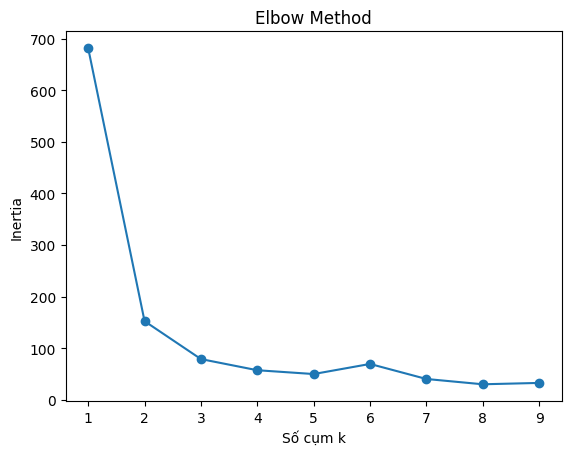

In [10]:
#vẽ biểu đồ elbow
Ks = range(1, 10)
inertias = []

for k in Ks:
    centroids, labels = kmeans(X, k)
    inertias.append(inertia(X, centroids, labels))

plt.plot(Ks, inertias, marker='o')
plt.xlabel("Số cụm k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [14]:
#tìm điểm mới
new_point = np.array([[5.1, 3.5, 1.4, 0.2]])
cluster = closest_centroid(new_point, centroids)
print("Điểm mới thuộc cụm:", cluster[0])


Điểm mới thuộc cụm: 0


In [13]:
#bài toán phân cụm khách hàng
#load dữ liệu khách hàng
df = pd.read_csv("Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [15]:
#chọn đặc trưng số
X_customer = df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']].dropna().values


In [16]:
#chạy k mean
centroids, labels = kmeans(X_customer, k=4)


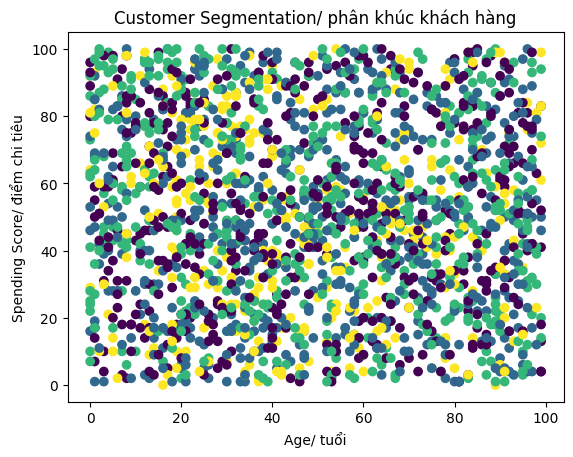

In [18]:
#trực quan hóa -> kết quả
plt.scatter(X_customer[:,0], X_customer[:,2], c=labels)
plt.xlabel("Age/ tuổi")
plt.ylabel("Spending Score/ điểm chi tiêu")
plt.title("Customer Segmentation/ phân khúc khách hàng")
plt.show()


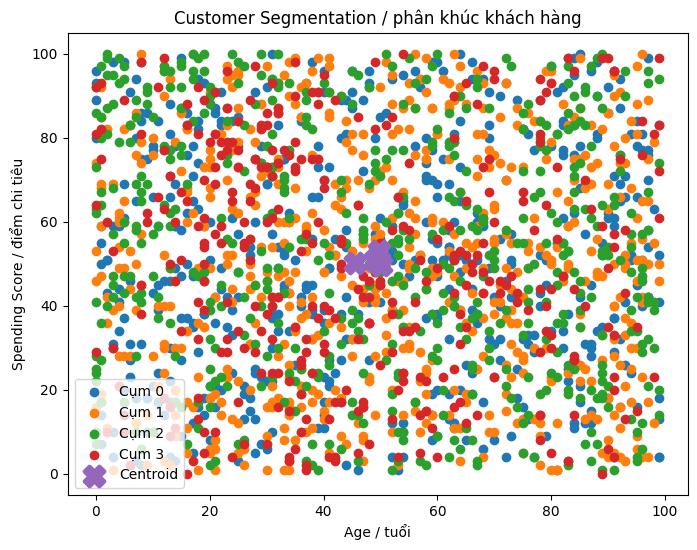

In [22]:
plt.figure(figsize=(8,6))

for i in range(len(np.unique(labels))):
    plt.scatter(
        X_customer[labels == i, 0],   # Age
        X_customer[labels == i, 2],   # Spending Score
        label=f"Cụm {i}"
    )


plt.xlabel("Age / tuổi")
plt.ylabel("Spending Score / điểm chi tiêu")
plt.title("Customer Segmentation / phân khúc khách hàng")
plt.legend()

plt.scatter(centroids[:,0], centroids[:,2], 
            marker='X', s=200, linewidths=3, label='Centroid')
plt.legend()

plt.show()



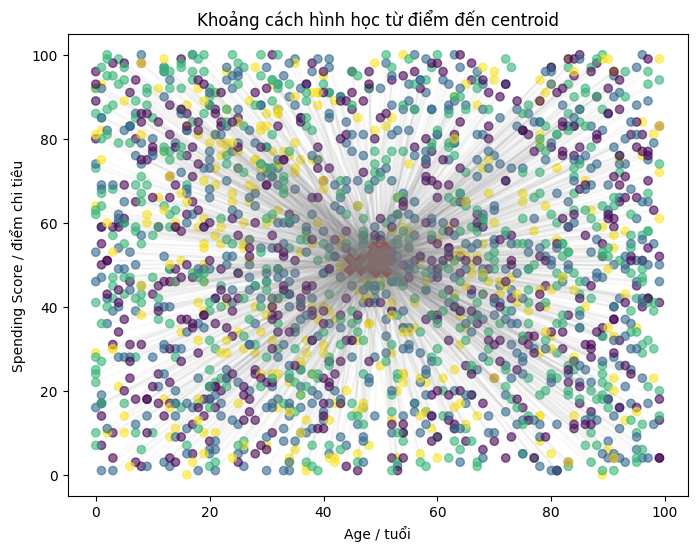

In [24]:
plt.figure(figsize=(8,6))

for i in range(len(X_customer)):
    c = centroids[labels[i]]
    plt.plot(
        [X_customer[i,0], c[0]],
        [X_customer[i,2], c[2]],
        color='gray',
        alpha=0.05
    )

plt.scatter(X_customer[:,0], X_customer[:,2], c=labels, alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,2], marker='X', s=250, color='red')

plt.xlabel("Age / tuổi")
plt.ylabel("Spending Score / điểm chi tiêu")
plt.title("Khoảng cách hình học từ điểm đến centroid")
plt.show()



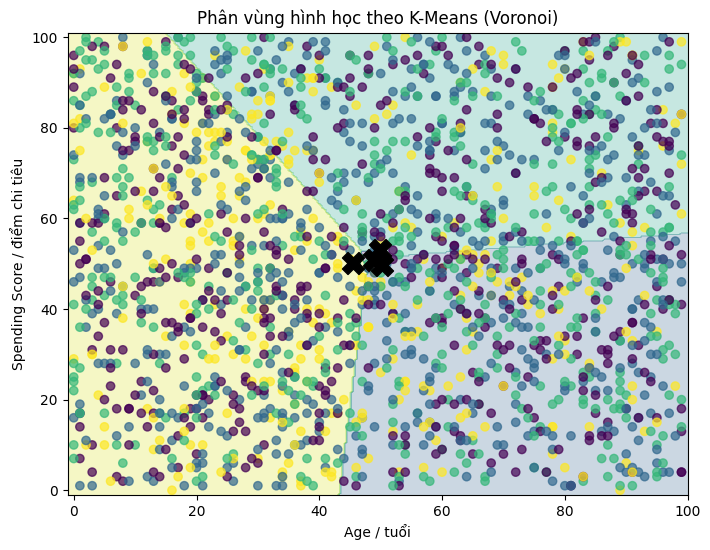

In [25]:
# tạo lưới điểm
x_min, x_max = X_customer[:,0].min()-1, X_customer[:,0].max()+1
y_min, y_max = X_customer[:,2].min()-1, X_customer[:,2].max()+1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]

# gán mỗi điểm lưới về centroid gần nhất
grid_labels = closest_centroid(grid, centroids[:,[0,2]])
grid_labels = grid_labels.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, grid_labels, alpha=0.25)

plt.scatter(X_customer[:,0], X_customer[:,2], c=labels, alpha=0.7)
plt.scatter(centroids[:,0], centroids[:,2], marker='X', s=250, color='black')

plt.xlabel("Age / tuổi")
plt.ylabel("Spending Score / điểm chi tiêu")
plt.title("Phân vùng hình học theo K-Means (Voronoi)")
plt.show()
